<a href="https://colab.research.google.com/github/ParhamKnt/INSE6220/blob/main/ParhamKNT40221138INSE6220Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Principal Component Analysis (PCA) & Multi-classification of Pizza Micronutrients Datset***

---

# Importing Python libraries and installing PyCaret 2.3.6:

In [ ]:
## Importing Stuff! ##
!pip install pycaret==2.3.6
from pycaret.utils import version
version()
from pycaret.utils import enable_colab 
enable_colab()
!pip install pca
from pca import pca
import pycaret
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from scipy.stats import beta
from scipy.stats import f
from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
print("Pandas Version: {}".format(pd.__version__))
print("Numpy Version: {}".format(np.__version__))
print("Matplotlib Version: {}".format(matplotlib.__version__))
print("Scikit-learn Version: {}".format(sklearn.__version__))
print("Seaborn Version: {}".format(sns.__version__))

In [ ]:
from pycaret.utils import version
version()

'2.3.6'

# Dataset Description
The dataset is obtained from ["Data World"](https://https://data.world/sdhilip/pizza-datasets) and it contains information about the micronutrients that make a pizza tasty! about 300 pizzas from 10 different brands have been selected and the amount of their ingredients per 100 grams were listed in this dataset. The dataset also contains the sample ID for each pizza which will eventually get deleted in this project and will no longer be in use.
The variables in the data are:


*   **brand**: Pizza brand (class label)
*   **id**: Sample analyzed
*   **mois**: Amount of water per 100 grams in the sample
*   **prot**: Amount of protein per 100 grams in the sample
*   **fat**: Amount of fat per 100 grams in the sample
*   **ash**: Amount of ash per 100 grams in the sample
*   **sodium**: Amount of sodium per 100 grams in the sample
*   **carb**: Amount of carbohydrates per 100 grams in the sample
*   **cal**: Amount of calories per 100 grams in the sample











In [ ]:
## Dataset 
from google.colab import files
uploaded=files.upload()
df=pd.read_csv('Pizza.csv')
#df = pd.read_csv(r'https://github.com/ParhamKnt/INSE6220/blob/main/Pizza.csv')
df.head(n=25)
df.info()
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Saving Pizza.csv to Pizza.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   brand   300 non-null    object 
 1   id      300 non-null    int64  
 2   mois    300 non-null    float64
 3   prot    300 non-null    float64
 4   fat     300 non-null    float64
 5   ash     300 non-null    float64
 6   sodium  300 non-null    float64
 7   carb    300 non-null    float64
 8   cal     300 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 21.2+ KB
Number of rows with NaNs is:  0


**Exploratory Data Analysis** and **Data Matrix:**

*   It is worth mentioning that the "id" column of the dataset will be dropped, because it was not very important and we wanted to work with only one column as the label in this project.




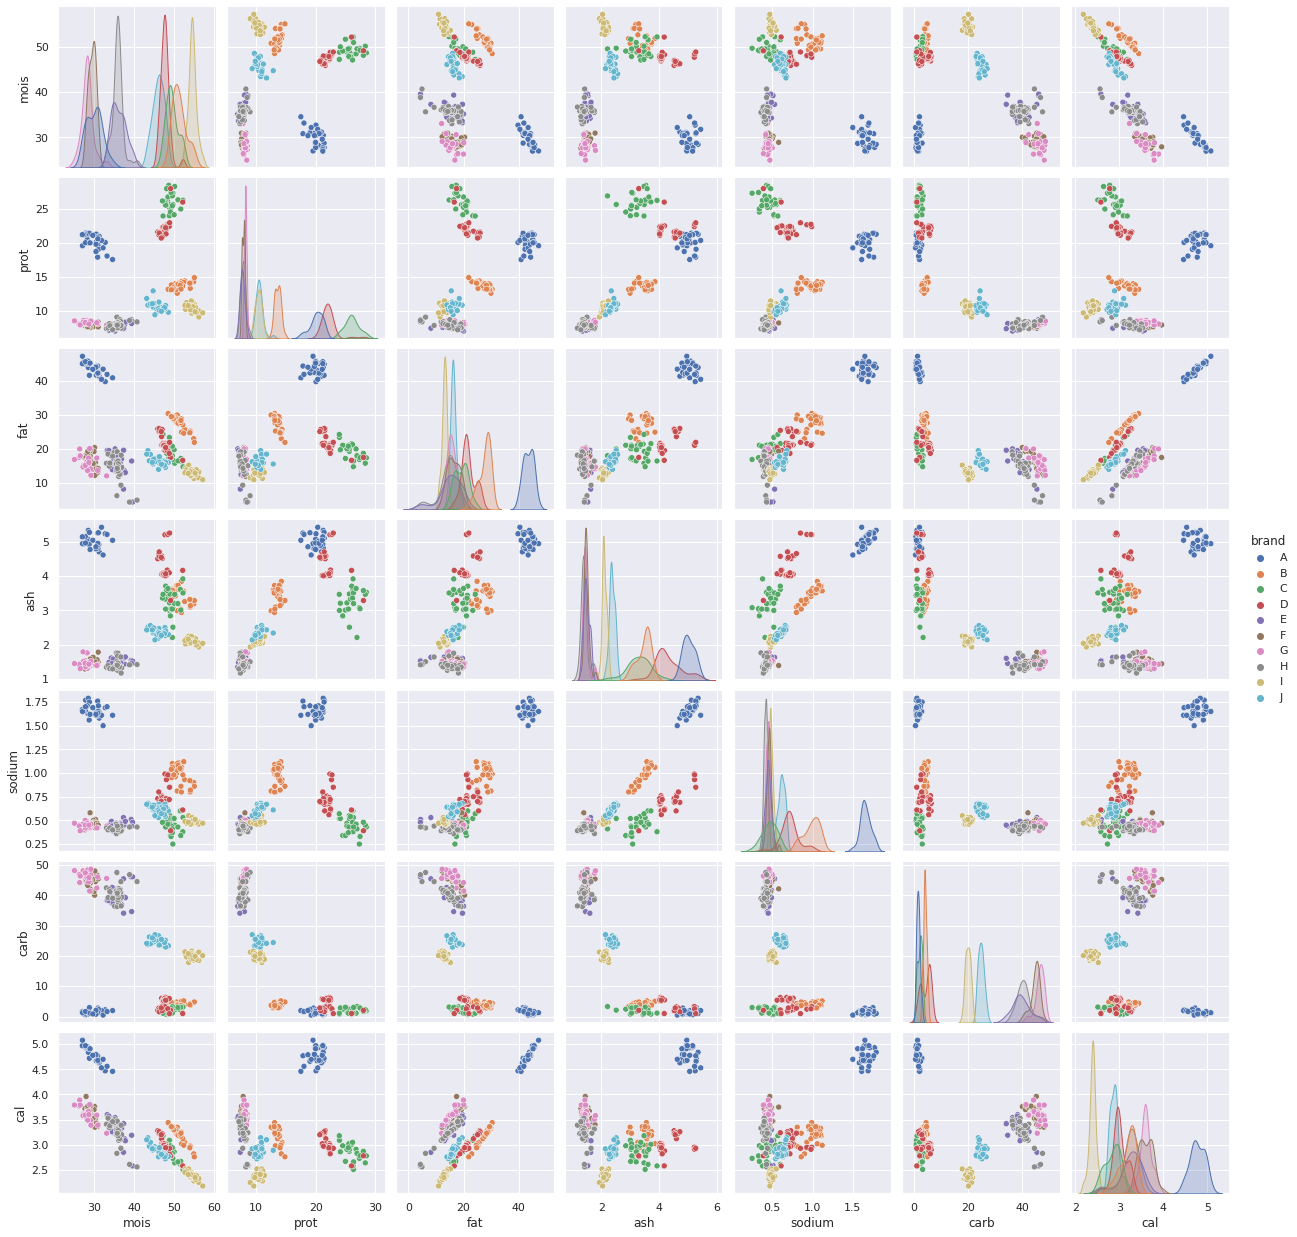

mois   prot    fat   ash  sodium  carb   cal
0  27.82  21.43  44.87  5.11    1.77  0.77  4.93
1  28.49  21.26  43.89  5.34    1.79  1.02  4.84
2  28.35  19.99  45.78  5.08    1.63  0.80  4.95
3  30.55  20.15  43.13  4.79    1.61  1.38  4.74
4  30.49  21.28  41.65  4.82    1.64  1.76  4.67
5  31.14  20.23  42.31  4.92    1.65  1.40  4.67
6  31.21  20.97  41.34  4.71    1.58  1.77  4.63
7  28.76  21.41  41.60  5.28    1.75  2.95  4.72
8  28.22  20.48  45.10  5.02    1.71  1.18  4.93
9  27.72  21.19  45.29  5.16    1.66  0.64  4.95

In [ ]:
# Ommiting the ID column
df=df.drop(['id'], axis=1)

# Pair Plot
sns.pairplot(df, hue='brand')
plt.show()

# Defining the class column
y = df['brand']
target = df['brand'].to_numpy()

# Converting categorial classification to numerical classification
df['brand'].replace(['A', 'B', 'C', 'D', 'E', 'F','G','H','I','J'],[1,2,3,4,5,6,7,8,9,10], inplace=True)

# Defining Attributes columns
X = df.drop(columns=['brand'])
X.head(10)

In [ ]:
X.describe().transpose()

count       mean        std    min      25%     50%      75%    max
mois    300.0  40.903067   9.552987  25.00  30.9025  43.300  49.1150  57.22
prot    300.0  13.373567   6.434392   6.98   8.0600  10.440  20.0225  28.48
fat     300.0  20.229533   8.975658   4.38  14.7700  17.135  21.4350  47.20
ash     300.0   2.633233   1.269724   1.17   1.4500   2.225   3.5925   5.43
sodium  300.0   0.669400   0.370358   0.25   0.4500   0.490   0.7025   1.79
carb    300.0  22.864767  18.029722   0.51   3.4675  23.245  41.3375  48.64
cal     300.0   3.271000   0.620034   2.18   2.9100   3.215   3.5200   5.08


**Standardizing the data:**

In [ ]:
# Standardizing the data
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)
X.describe().transpose()

# Defining Observations and Variables
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

**Plotting Pie Chart and Bar Plot:**

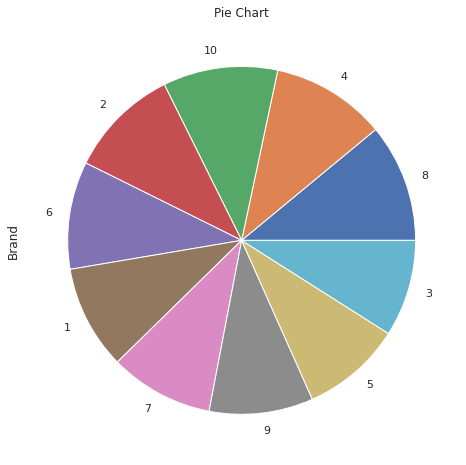

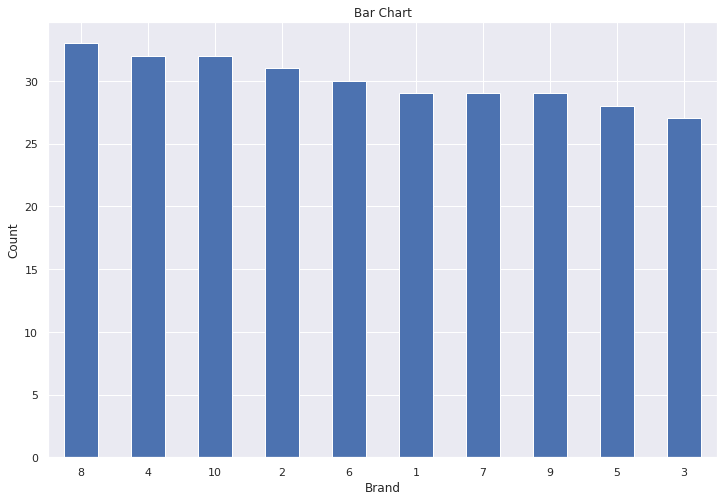

In [ ]:
## Plotting ##

# Pie Chart
y.value_counts().plot(kind='pie')
plt.ylabel('Brand')
plt.title('Pie Chart')
plt.show()

# Bar Plot
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Bar Chart')
plt.show()

**Plotting Box Plot and Swarm Plot:**

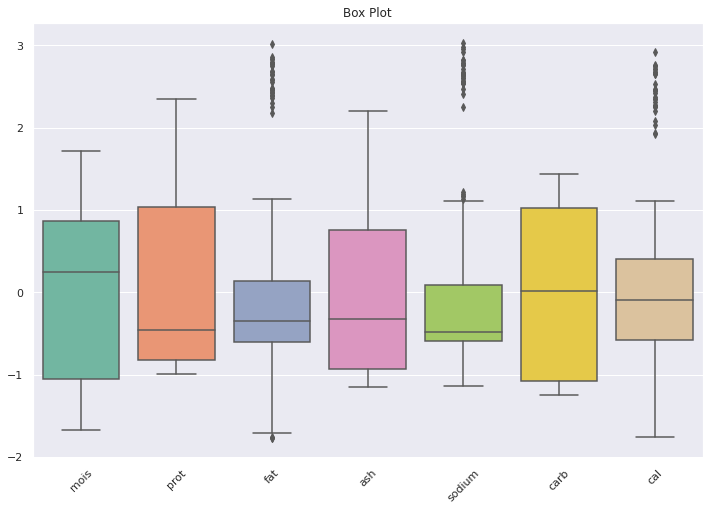

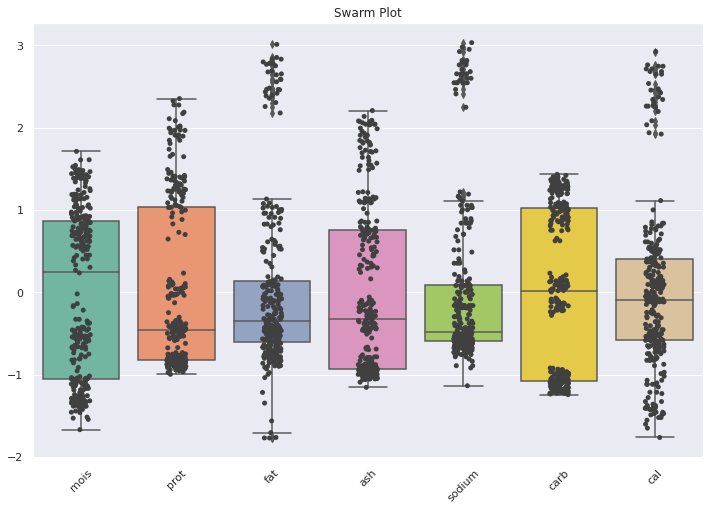

In [ ]:
# Box Plot
box = plt.figure()
plt.title('Box Plot')
box = sns.boxplot(data=X, orient="v", palette="Set2")
box.set_xticklabels(box.get_xticklabels(),rotation=45);

#Swarm Plot
ax = plt.figure()    
plt.title('Swarm Plot')
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix:**

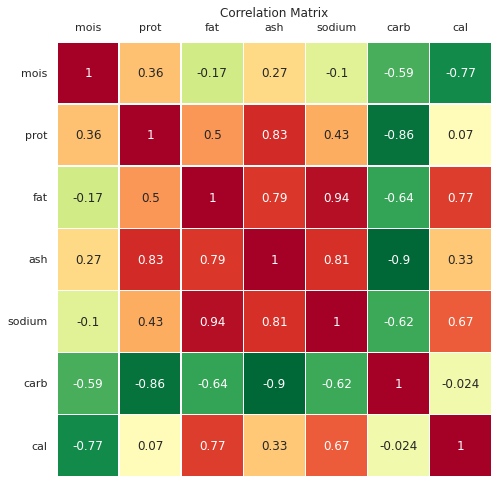

In [ ]:
# Correlation Matrix
ax=plt.figure()
plt.title('Correlation Matrix')
ax = sns.heatmap(X.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

# Principal Component Analysis (PCA)
**Using PCA library -**
Principal Components:

In [ ]:
## Principal Component Analysis (PCA) ##
model=pca()
out = model.fit_transform(X)
out['PC']

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PC1       PC2       PC3
0    5.010343  2.679215 -0.039327
1    5.023755  2.529295 -0.097056
2    4.805439  2.673700 -0.075475
3    4.469543  2.285029 -0.120233
4    4.471893  2.159152 -0.000738
..        ...       ...       ...
295 -0.535510 -0.530843 -0.426490
296 -0.339636 -0.243230 -0.281174
297 -0.646433 -0.515434 -0.370378
298 -0.865078 -0.921790 -0.493755
299 -0.895868 -0.767878 -0.530108

[300 rows x 3 columns]

**Scatter Plot:**

<Figure size 864x576 with 0 Axes>

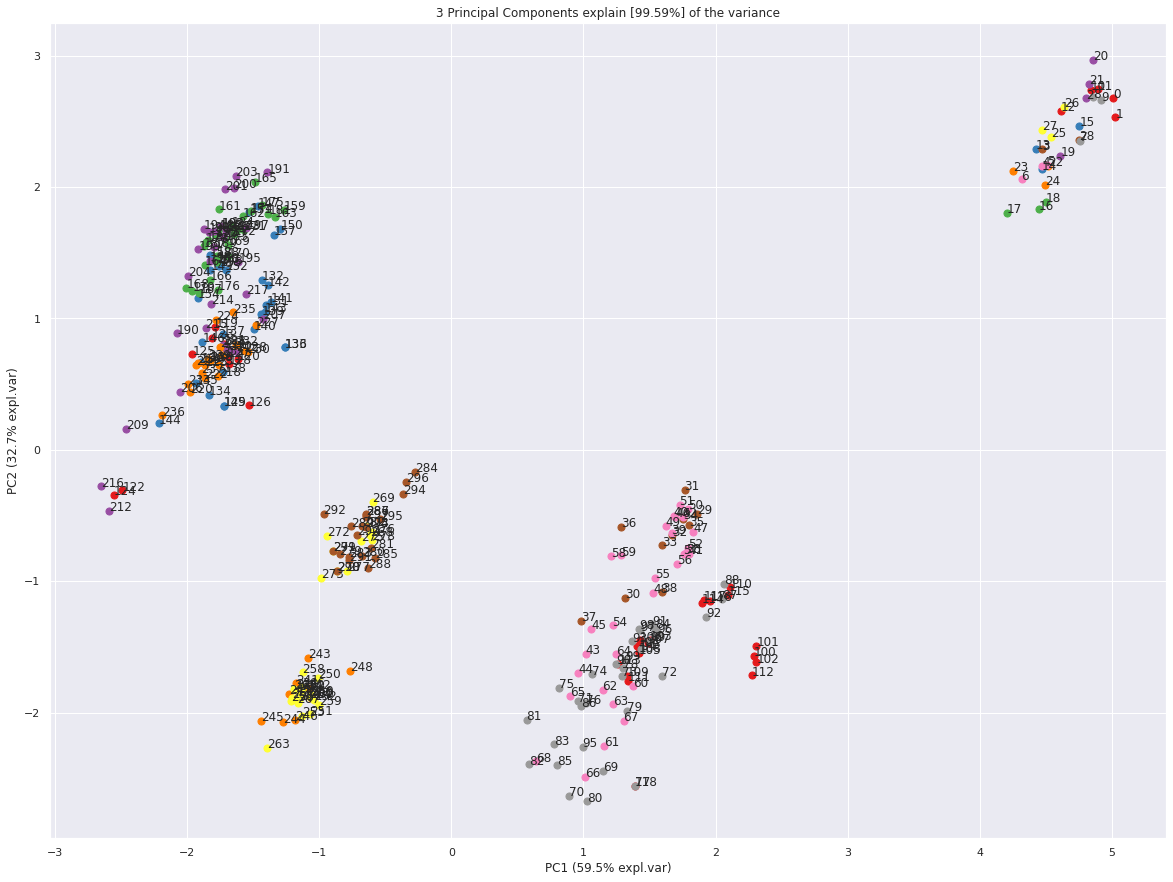

In [ ]:
##Scatter Plot
plt.figure()
model.scatter(label=True, legend=False)
plt.show()

**Eigenvector Matrix and Plot:**

Eigenvector matrix:
             PC1       PC2       PC3
mois    0.064709 -0.628276 -0.421669
prot    0.378761 -0.269707  0.746027
fat     0.446666  0.234379 -0.199309
ash     0.471890 -0.110990  0.056273
sodium  0.435703  0.201662 -0.455169
carb   -0.424914  0.320312  0.052237
cal     0.244487  0.567458  0.113316


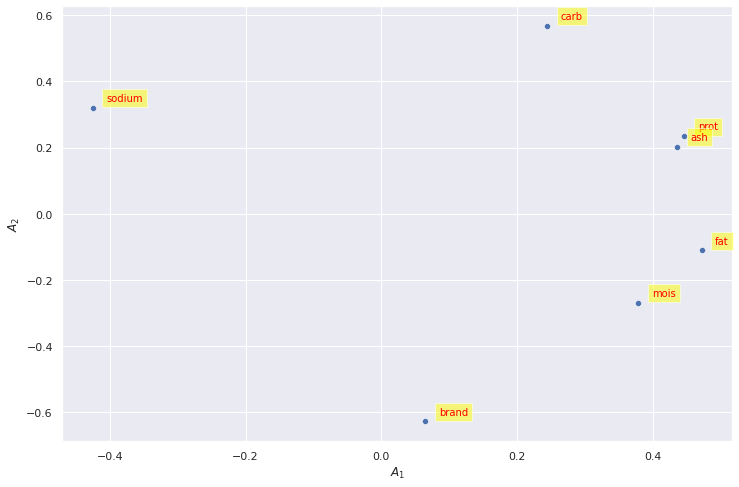

In [ ]:
# Eigenvectors
A = out['loadings'].T
print(f'Eigenvector matrix:\n{A}')
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot:**

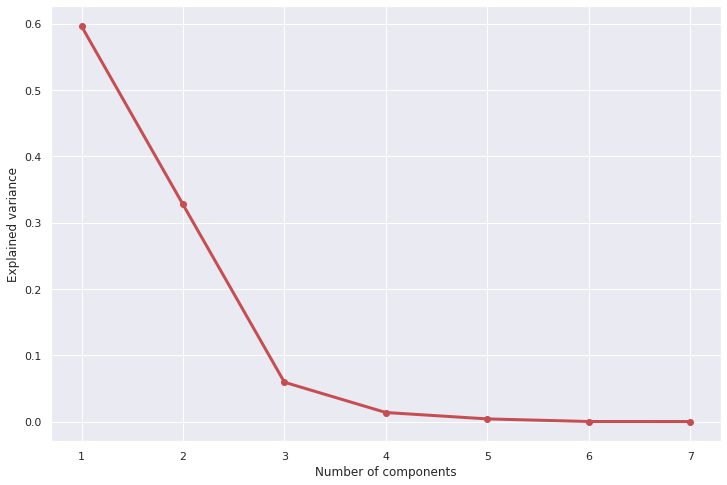

In [ ]:
## Scree 
plt.figure()
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot:**

<Figure size 864x576 with 0 Axes>

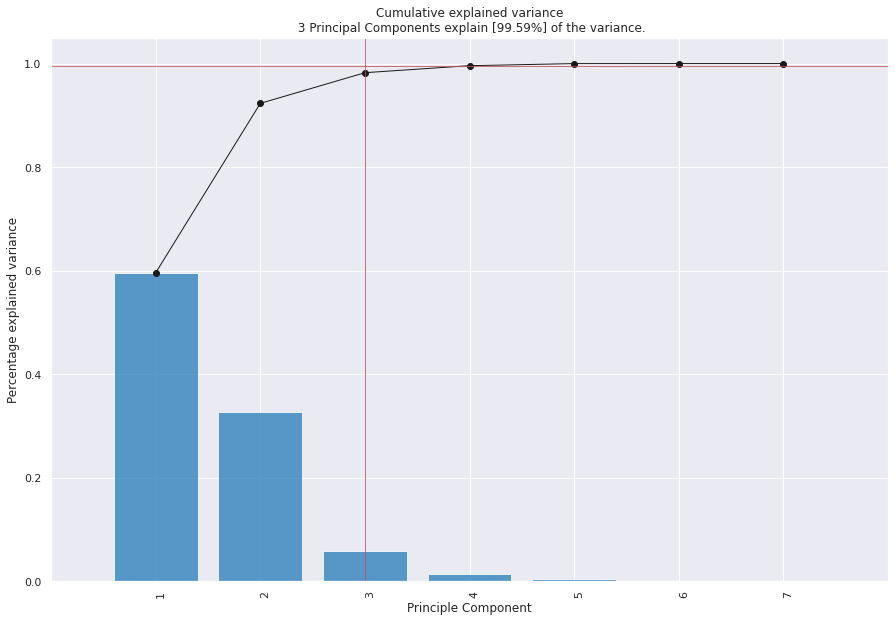

<Figure size 864x576 with 0 Axes>

In [ ]:
## Explained Variance Plot
plt.figure()
model.plot()
plt.show()

**Biplot:**

[pca] >Plot PC1 vs PC2 with loadings.


<Figure size 864x576 with 0 Axes>

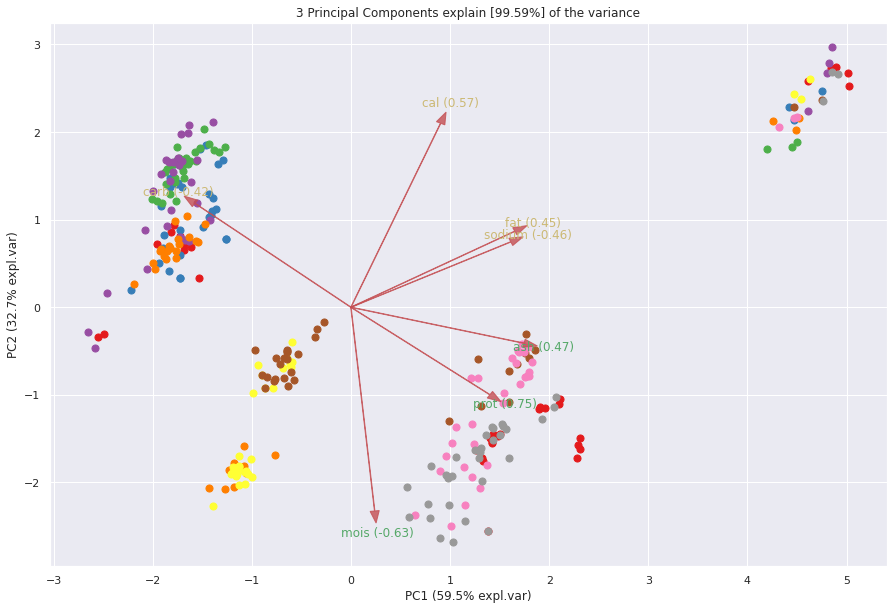

In [ ]:
# BiPlot
plt.figure()
model.biplot(label=False, legend=False)
plt.show()

# Multi Classification
**Setting up the PyCaret and the environment:**

In [ ]:
## Multi-Class Classification ##
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (270, 8)
Unseen Data For Predictions: (30, 8)


*   As it is given above, a number of 30 samples have been selected from the original dataset for prediction. The other 270 samples have been used for modelling purposes.




In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='brand', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             brand
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (270, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (188, 7)
12                    Transformed Test Set           (82, 7)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              07ab
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

*   The "Setup" function was used to create the environment for PyCaret and to 
prepare the data for modelling. It takes the target column and the panda dataframe as its input. The session ID is used to save the information for later use. After being executed, it gives out some important information such as Number of Missing Values in the dataset which here is 0 and Number of Numeric Features of the dataset, which here is 7 out of 8. It also shows that (188,7) samples are taken as train set and (82,7) samples as test set.


# Comparing Models

In [ ]:
# Comparing Models
best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.9044  0.9918  0.9100  0.9126   
rf               Random Forest Classifier    0.8991  0.9958  0.9050  0.9047   
et                 Extra Trees Classifier    0.8936  0.9922  0.9000  0.9028   
nb                            Naive Bayes    0.8827  0.9903  0.8900  0.8934   
lr                    Logistic Regression    0.8822  0.9862  0.8900  0.8919   
lda          Linear Discriminant Analysis    0.8775  0.9879  0.8850  0.8750   
knn                K Neighbors Classifier    0.8725  0.9811  0.8800  0.8762   
gbc          Gradient Boosting Classifier    0.8512  0.9862  0.8600  0.8509   
dt               Decision Tree Classifier    0.8345  0.9079  0.8450  0.8229   
qda       Quadratic Discriminant Analysis    0.8137  0.9667  0.8217  0.7748   
ridge                    Ridge Classifier    0.6386  0.0000  0.6200  0.5327   
svm                   SVM - Linear Kernel    0.5740  0.0000  0.5650  0.4610   
ada                  Ada Boost Classifier    0.4632  0.8137  0.4550  0.3665   
dummy                    Dummy Classifier    0.1064  0.5000  0.1000  0.0113   

              F1   Kappa     MCC  TT (Sec)  
lightgbm  0.8956  0.8933  0.8978     0.152  
rf        0.8854  0.8876  0.8939     0.530  
et        0.8837  0.8814  0.8863     0.472  
nb        0.8755  0.8693  0.8733     0.039  
lr        0.8748  0.8686  0.8723     1.209  
lda       0.8619  0.8634  0.8696     0.020  
knn       0.8591  0.8579  0.8638     0.145  
gbc       0.8386  0.8342  0.8416     0.892  
dt        0.8126  0.8156  0.8235     0.077  
qda       0.7729  0.7924  0.8071     0.021  
ridge     0.5606  0.5971  0.6245     0.016  
svm       0.4815  0.5241  0.5658     0.082  
ada       0.3807  0.4001  0.4968     0.217  
dummy     0.0205  0.0000  0.0000     0.017

In [ ]:
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

**Creating a Model:**

*   "create_model" function trains and evaluate a model using cross validation and gives out the Accuracy, Percision and etc. as its output. In this project, Light Gradient Boosting Machine Classifier (lightgbm) and Random Forest Classifier (rf) because of their high accuracy and K-Nearest Neighbors Classifier (knn) for comparison are being used as models.


**Creating Light Gradient Boosting Machine Classifier**:

In [ ]:
# Creating Light Gradient Boosting Machine Classifier
lightgbm = create_model('lightgbm')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9474  1.0000   0.950  0.9649  0.9439  0.9414  0.9443
1       0.9474  0.9938   0.950  0.9649  0.9439  0.9414  0.9443
2       1.0000  1.0000   1.000  1.0000  1.0000  1.0000  1.0000
3       0.8421  0.9628   0.850  0.8421  0.8246  0.8241  0.8318
4       0.8947  1.0000   0.900  0.8421  0.8596  0.8827  0.8938
5       0.8947  1.0000   0.900  0.9298  0.8877  0.8827  0.8882
6       0.8421  0.9845   0.850  0.8596  0.8386  0.8241  0.8266
7       0.8421  0.9876   0.850  0.8246  0.8316  0.8230  0.8255
8       0.8889  0.9931   0.900  0.9352  0.8852  0.8763  0.8824
9       0.9444  0.9965   0.950  0.9630  0.9407  0.9379  0.9412
Mean    0.9044  0.9918   0.910  0.9126  0.8956  0.8933  0.8978
SD      0.0515  0.0110   0.049  0.0608  0.0561  0.0575  0.0562

In [ ]:
lightgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

**Tuning the Model:**
*   "tune_model" function tries to tune the hyperparameters of the model on a pre-defined search space and gives Accuracy, Pericision and etc. as its output.




**Tuned Light Gradient Boosting Machine Model:**

In [ ]:
# Tune Light Gradient Boosting Machine Model
tuned_lightgbm = tune_model(lightgbm)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8947  0.9752   0.900  0.9298  0.8877  0.8827  0.8882
1       0.8947  1.0000   0.900  0.8421  0.8596  0.8827  0.8938
2       0.9474  0.9938   0.950  0.9649  0.9439  0.9414  0.9443
3       0.8421  0.9505   0.850  0.8070  0.8035  0.8241  0.8371
4       0.8421  0.9969   0.850  0.8070  0.8035  0.8241  0.8371
5       0.9474  0.9969   0.950  0.9649  0.9439  0.9414  0.9443
6       0.8421  0.9907   0.850  0.8772  0.8491  0.8241  0.8266
7       0.9474  0.9938   0.950  0.9649  0.9439  0.9410  0.9439
8       0.8889  0.9931   0.900  0.9352  0.8852  0.8763  0.8824
9       0.8333  1.0000   0.800  0.8333  0.8037  0.8131  0.8218
Mean    0.8880  0.9891   0.890  0.8926  0.8724  0.8751  0.8819
SD      0.0447  0.0145   0.049  0.0631  0.0553  0.0499  0.0474

In [ ]:
tuned_lightgbm

LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

**Evaluating the Model:**

*   "evaluate_model" function is being used in order to analyze the model performance using various plots such as decision boundary, ROC, Gain chart and etc.




In [ ]:
!pip install statsmodels --upgrade

**Evaluating Light Gradient Boosting Machine Model:**

In [ ]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Creating Random Forest Model:**

In [ ]:
# Create Random Forest Model
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8947  1.0000  0.9000  0.9298  0.8877  0.8827  0.8882
1       0.8947  0.9876  0.9000  0.8421  0.8596  0.8827  0.8938
2       0.8947  0.9969  0.9000  0.9298  0.8877  0.8827  0.8882
3       0.8421  0.9876  0.8500  0.8070  0.8035  0.8241  0.8371
4       0.8421  1.0000  0.8500  0.8070  0.8035  0.8241  0.8371
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.8947  0.9938  0.9000  0.8947  0.8947  0.8827  0.8827
7       0.8947  0.9954  0.9000  0.9386  0.8912  0.8824  0.8879
8       0.8889  0.9965  0.9000  0.9352  0.8852  0.8763  0.8824
9       0.9444  1.0000  0.9500  0.9630  0.9407  0.9379  0.9412
Mean    0.8991  0.9958  0.9050  0.9047  0.8854  0.8876  0.8939
SD      0.0435  0.0046  0.0415  0.0624  0.0551  0.0485  0.0451

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tuning the Random Forest Model:**

In [ ]:
# Tune Random Forest Model
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8947  0.9938   0.900  0.9298  0.8877  0.8827  0.8882
1       0.8947  0.9845   0.900  0.8421  0.8596  0.8827  0.8938
2       1.0000  0.9969   1.000  1.0000  1.0000  1.0000  1.0000
3       0.7895  0.9814   0.800  0.7895  0.7754  0.7654  0.7702
4       0.7895  1.0000   0.800  0.7719  0.7474  0.7654  0.7800
5       0.9474  1.0000   0.950  0.9649  0.9439  0.9414  0.9443
6       0.8947  0.9876   0.900  0.8947  0.8947  0.8827  0.8827
7       0.8947  0.9938   0.900  0.8421  0.8596  0.8820  0.8932
8       0.9444  0.9931   0.950  0.9630  0.9407  0.9379  0.9412
9       0.9444  0.9931   0.950  0.9630  0.9407  0.9379  0.9412
Mean    0.8994  0.9924   0.905  0.8961  0.8850  0.8878  0.8935
SD      0.0638  0.0059   0.061  0.0763  0.0743  0.0711  0.0683

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluating the Random Forest Model:**

In [ ]:
# Evaluate Random Forest Model
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Creating K-Nearest Neighbors Model:**

In [ ]:
# Create K-Nearest Neighbor Model
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.9845  0.8500  0.8070  0.8035  0.8241  0.8371
1       0.8421  0.9969  0.8500  0.8158  0.8070  0.8246  0.8376
2       0.7895  0.9489  0.8000  0.7895  0.7895  0.7654  0.7654
3       0.8421  0.9783  0.8500  0.8596  0.8386  0.8241  0.8266
4       0.8421  0.9938  0.8500  0.8070  0.8035  0.8241  0.8371
5       0.9474  0.9938  0.9500  0.9649  0.9439  0.9414  0.9443
6       0.9474  0.9969  0.9500  0.9649  0.9439  0.9414  0.9443
7       0.8947  0.9660  0.9000  0.9386  0.8912  0.8824  0.8879
8       0.8889  0.9653  0.9000  0.9259  0.8815  0.8759  0.8820
9       0.8889  0.9861  0.9000  0.8889  0.8889  0.8759  0.8759
Mean    0.8725  0.9811  0.8800  0.8762  0.8591  0.8579  0.8638
SD      0.0478  0.0154  0.0458  0.0658  0.0556  0.0532  0.0521

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tuning K-Nearest Neighbors Model:**

In [ ]:
# Tune KNN Model
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.9644  0.8500  0.8070  0.8035  0.8241  0.8371
1       0.9474  0.9706  0.9500  0.9649  0.9439  0.9414  0.9443
2       0.8421  0.9319  0.8500  0.8596  0.8386  0.8241  0.8266
3       0.8421  0.9350  0.8500  0.8596  0.8386  0.8241  0.8266
4       0.8421  0.9675  0.8500  0.8070  0.8035  0.8241  0.8371
5       0.9474  1.0000  0.9500  0.9649  0.9439  0.9414  0.9443
6       0.9474  0.9938  0.9500  0.9649  0.9439  0.9414  0.9443
7       0.8947  0.9397  0.9000  0.9386  0.8912  0.8824  0.8879
8       0.8889  0.9375  0.9000  0.9259  0.8815  0.8759  0.8820
9       0.8889  0.9861  0.9000  0.8333  0.8519  0.8759  0.8882
Mean    0.8883  0.9626  0.8950  0.8926  0.8740  0.8754  0.8818
SD      0.0436  0.0242  0.0415  0.0626  0.0528  0.0486  0.0468

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


**Evaluating K-Nearest Neighbors Model:**

In [ ]:
# Evaluate KNN
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Classification with PCA

In [ ]:
## Classification + PCA ##
clf_pca = setup(data=data, target='brand', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             brand
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (270, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (188, 3)
12                    Transformed Test Set           (82, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              a86b
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='brand',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='brand')),
                ('fix_perfect', Remove_100(target='brand')),
                ('clean_names', Clean_Colum_Names()),
       

In [ ]:
# The Best model
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
nb                            Naive Bayes    0.8883  0.9887  0.8950  0.8970   
et                 Extra Trees Classifier    0.8883  0.9924  0.8950  0.9075   
qda       Quadratic Discriminant Analysis    0.8877  0.9892  0.8967  0.9000   
rf               Random Forest Classifier    0.8775  0.9908  0.8850  0.8871   
lda          Linear Discriminant Analysis    0.8772  0.9879  0.8850  0.8897   
dt               Decision Tree Classifier    0.8725  0.9292  0.8750  0.8944   
knn                K Neighbors Classifier    0.8670  0.9859  0.8750  0.8729   
lightgbm  Light Gradient Boosting Machine    0.8617  0.9887  0.8700  0.8699   
gbc          Gradient Boosting Classifier    0.8567  0.9775  0.8650  0.8893   
lr                    Logistic Regression    0.8196  0.9807  0.8300  0.8021   
svm                   SVM - Linear Kernel    0.7284  0.0000  0.7167  0.6621   
ridge                    Ridge Classifier    0.5219  0.0000  0.5100  0.3582   
ada                  Ada Boost Classifier    0.4731  0.8380  0.4550  0.3712   
dummy                    Dummy Classifier    0.1064  0.5000  0.1000  0.0113   

              F1   Kappa     MCC  TT (Sec)  
nb        0.8737  0.8755  0.8823     0.028  
et        0.8807  0.8755  0.8801     0.523  
qda       0.8805  0.8749  0.8791     0.031  
rf        0.8680  0.8635  0.8684     0.550  
lda       0.8698  0.8631  0.8670     0.031  
dt        0.8661  0.8580  0.8629     0.031  
knn       0.8569  0.8516  0.8563     0.139  
lightgbm  0.8480  0.8459  0.8521     0.177  
gbc       0.8508  0.8404  0.8463     1.111  
lr        0.7987  0.7990  0.8060     0.061  
svm       0.6679  0.6968  0.7171     0.078  
ridge     0.4046  0.4666  0.5029     0.018  
ada       0.3854  0.4074  0.4803     0.147  
dummy     0.0205  0.0000  0.0000     0.027

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GaussianNB(priors=None, var_smoothing=1e-09)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model_pca

GaussianNB(priors=None, var_smoothing=1e-09)

**Tune the Best Model (Gaussian Naive Bayes):**

In [ ]:
# Tune hyperparameters
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.9907    0.85  0.8947  0.8316  0.8241  0.8318
1       0.8947  0.9752    0.90  0.8421  0.8596  0.8827  0.8938
2       0.9474  0.9876    0.95  0.9649  0.9439  0.9414  0.9443
3       0.8421  0.9752    0.85  0.8596  0.8386  0.8241  0.8266
4       0.8421  0.9876    0.85  0.8947  0.8316  0.8241  0.8318
5       0.8947  1.0000    0.90  0.9298  0.8877  0.8827  0.8882
6       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
7       0.9474  0.9876    0.95  0.9649  0.9439  0.9410  0.9439
8       0.8333  0.9792    0.85  0.7963  0.7926  0.8138  0.8282
9       0.8889  1.0000    0.90  0.8333  0.8519  0.8759  0.8882
Mean    0.8933  0.9883    0.90  0.8981  0.8781  0.8810  0.8877
SD      0.0536  0.0092    0.05  0.0629  0.0615  0.0597  0.0570

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:GaussianNB(priors=None, var_smoothing=0.002)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best_model_pca

GaussianNB(priors=None, var_smoothing=0.002)

**Evaluate the Best Model (Gaussian Naive Bayes):**

In [ ]:
# Evaluate the best model
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GaussianNB(priors=None, var_smoothing=0.002), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Explainable AI with Shapley Values

*   A prediction can be explained by assuming that each feature value of the instance is a “player” in a game where the prediction is the payout. The Shapley Values (by Shapley, Lloyd S. (1953)) is a method that uses Game Theory to fairly distribute this "payout" among the features.




In [ ]:
## Explainable AI with Shapley Values ##
!pip install shap
import shap

In [ ]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8947  1.0000  0.9000  0.9298  0.8877  0.8827  0.8882
1       0.8947  0.9876  0.9000  0.8421  0.8596  0.8827  0.8938
2       0.8947  0.9969  0.9000  0.9298  0.8877  0.8827  0.8882
3       0.8421  0.9876  0.8500  0.8070  0.8035  0.8241  0.8371
4       0.8421  1.0000  0.8500  0.8070  0.8035  0.8241  0.8371
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.8947  0.9938  0.9000  0.8947  0.8947  0.8827  0.8827
7       0.8947  0.9954  0.9000  0.9386  0.8912  0.8824  0.8879
8       0.8889  0.9965  0.9000  0.9352  0.8852  0.8763  0.8824
9       0.9444  1.0000  0.9500  0.9630  0.9407  0.9379  0.9412
Mean    0.8991  0.9958  0.9050  0.9047  0.8854  0.8876  0.8939
SD      0.0435  0.0046  0.0415  0.0624  0.0551  0.0485  0.0451

In [ ]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8947  0.9938   0.900  0.9298  0.8877  0.8827  0.8882
1       0.8947  0.9845   0.900  0.8421  0.8596  0.8827  0.8938
2       1.0000  0.9969   1.000  1.0000  1.0000  1.0000  1.0000
3       0.7895  0.9814   0.800  0.7895  0.7754  0.7654  0.7702
4       0.7895  1.0000   0.800  0.7719  0.7474  0.7654  0.7800
5       0.9474  1.0000   0.950  0.9649  0.9439  0.9414  0.9443
6       0.8947  0.9876   0.900  0.8947  0.8947  0.8827  0.8827
7       0.8947  0.9938   0.900  0.8421  0.8596  0.8820  0.8932
8       0.9444  0.9931   0.950  0.9630  0.9407  0.9379  0.9412
9       0.9444  0.9931   0.950  0.9630  0.9407  0.9379  0.9412
Mean    0.8994  0.9924   0.905  0.8961  0.8850  0.8878  0.8935
SD      0.0638  0.0059   0.061  0.0763  0.0743  0.0711  0.0683

**SHAP Summary Plot:**

*   A density scatter plot of SHAP values for each feature of the dataset is uesd to identify the importance of each feature for the model output in the validation dataset.




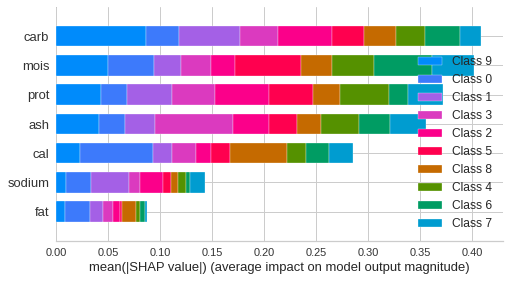

In [ ]:
# SHAP summary plot
interpret_model(tuned_rf_pca, plot='summary')

**Visualize a Single Prediction:**

*   The below plot shows the "base value" which is the mean predicted target and f(x) which is the prediction for observation #45. Features that are shown in red, has increased the predicted value. Whereas the blue-colored features has decreased it. The length of each feature demonstrate its importance on the model.




In [ ]:
# Visualize a Single prediction
interpret_model(tuned_rf_pca, plot='reason', observation=45)

**Visualize many Predictions:**

In [ ]:
# Visualize many predictions
interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
